<img src="https://i0.wp.com/newsroom.sephora.com/wp-content/uploads/2023/03/featured_sephora.jpg?resize=740%2C564&ssl=1"
     width="200" height="150">

## <h1 align='center'>Sephora Products and Skincare Reviews</h1>

## Introduction

A personal interest in makeup and skincare led me to look for a dataset related to this topic that would be useful for an interesting analysis of the data that is collected, in this case, by one of the biggest retailers in the United States. Exploratory and descriptive data analysis could lead to interesting insights about consumers' behavior (needs and preferences). In addition, the conclusions could be of great use for the Company to identify areas for improvement and investment. From a different perspective, understanding the main products and brands sold by the retailer can be helpful for those companies that distribute their products through Sephora.

In order to take this analysis even further, updated datasets about beauty retailers might be an essential tool for both the marketing and business strategy teams. Of course, this will depend on the focus and goals of the Company. However, I strongly believe that decision-making based on data provides a more reliable argument, no matter the audience.

## Data

This data set was collected from Kaggle. The criteria to select thhis database was the Company. Picking up Sephora was intentional considering that we wanted to know more about the Company's data. According to the website where it was gathered, the dataset includes information collected in March 2023. It has 27 columns x 8495 rows.

## Hypotheses

Based on the exploratory analysis of the data, the following are the hypotheses that will be tested: 

1. Primary product category has significantly different average prices.
2. The average price of products varies across different brands.
3. The average loves count for products in the primary category "Makeup" is significantly different from the average loves count for products in the primary category "Skincare".

These are just some of the several hypotheses that could have been tested after the exploratory analysis that will be done.

## Importing libraries and dataset

In [65]:
# pip install --upgrade Pillow

In [66]:
# Importing necessary libraries
import pandas as pd 
import numpy as np  
import re
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from wordcloud import WordCloud
from scipy.stats import f_oneway
from scipy.stats import spearmanr
import seaborn as sns
from textblob import TextBlob
from PIL import Image, ImageDraw, ImageFont
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camilahennessey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/camilahennessey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
# Importing the dataset I am going to analyze
sephrev = pd.read_csv('~/Desktop/Sephora Products and Skincare Reviews.csv', encoding= 'latin-1')

In [68]:
# I want to see the columns and first rows of the dataset imported
sephrev.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


## Cleaning Data

In [69]:
# Let's see the basic information about the data imported
sephrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [70]:
# In order to clean the dataset, I will check which are the columns with more missing values to define which will be the ones I am going to analyze
missing_values = sephrev.isnull().sum()
missing_values

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [71]:
# I will eliminate the columns that have more missing data because they don't provide enough information to be analyzed
columns_to_drop = ['size', 'variation_type', 'variation_value', 'variation_desc', 'value_price_usd','sale_price_usd','highlights', 'tertiary_category','child_max_price','child_min_price']

sephrev = sephrev.drop(columns=columns_to_drop)
sephrev.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,Fragrance,Value & Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women,2


In [72]:
# I want to find the mean rating and then fill the missing values with the mean of the ratings
mean_rating = sephrev[sephrev['rating'] != 0]['rating'].mean()
sephrev.loc[sephrev['rating'] == 0, 'rating'] = mean_rating

In [73]:
# I want to find the mean reviews and then fill the missing values with the mean of the reviews
mean_reviews = sephrev[sephrev['reviews'] != 0]['reviews'].mean()
sephrev.loc[sephrev['reviews'] == 0, 'reviews'] = mean_reviews

In [74]:
# Asking to fill the entries in the column of ingredients that are empty with 'No Information'
sephrev['ingredients'] = sephrev['ingredients'].fillna('No Information')

In [75]:
# Another step to clean even more the dataset for the analysis
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words = [PorterStemmer().stem(w) for w in filtered_words]
    lemma_words=[WordNetLemmatizer().lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

## Exploratory Data Analysis

In [76]:
# Statistics of the data after cleaning it
sephrev.describe()

,brand_id,loves_count,rating,reviews,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000


In [77]:
# I will drop more columns considering that there are some that don't provide useful information to analyze. For instance, for a descriptive analysis we don't need the product or the brand id
columns_to_drop = ['product_id', 'brand_id', 'child_count']

sephrev = sephrev.drop(columns=columns_to_drop)
sephrev.head()

,product_name,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,primary_category,secondary_category
0,Fragrance Discovery Set,19-69,6320,3.6364,11.0,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,0,0,1,0,0,Fragrance,Value & Gift Sets
1,La Habana Eau de Parfum,19-69,3827,4.1538,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
2,Rainbow Bar Eau de Parfum,19-69,3253,4.2500,16.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
3,Kasbah Eau de Parfum,19-69,3018,4.4762,21.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women
4,Purple Haze Eau de Parfum,19-69,2691,3.2308,13.0,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,0,Fragrance,Women


In [78]:
# I want to have the names of the columns well written to prevent mistakes while building the coding
columns = sephrev.columns
print(columns)

Index(['product_name', 'brand_name', 'loves_count', 'rating', 'reviews',
       'ingredients', 'price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'primary_category',
       'secondary_category'],
      dtype='object')


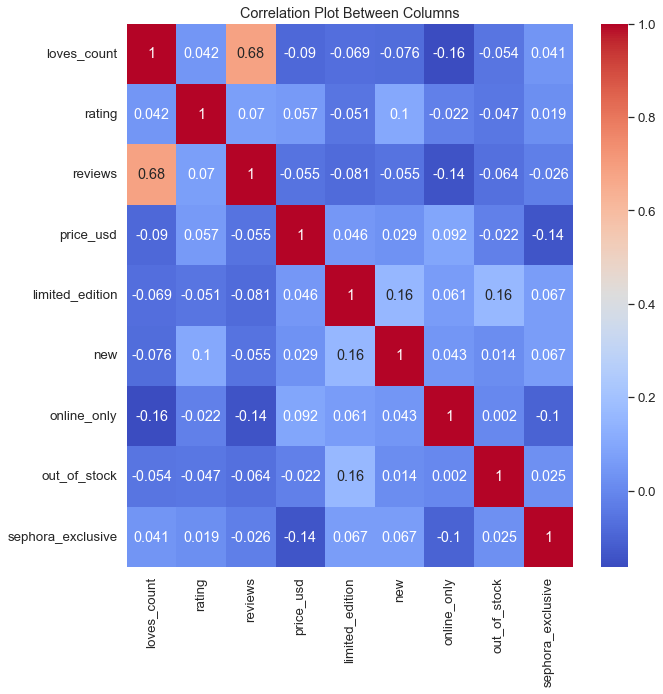

In [79]:
# Before any other analysis we want to know how the columns correlate
corr_matrix = sephrev.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Plot Between Columns')
plt.show()

From the correlation matrix, preliminary is possible to identify the following:

1.'Love_count' and 'reviews' are the columns with the highest correlation.(0.68)

2.There is some correlation between 'love_count' and 'online_only' (-0.16)

3.There is some correlation between 'rating' and 'new' (0.10)

4.There is some correlation between 'reviews' and 'online_only' (-0.14)

5.There is some correlation between 'price_usd' and 'sephora_exclusive' (-0.14)

6.There is a correlation between 'limited_edition' and 'new' (0.16)

7.There is some correlation between 'online_only' and 'sephora_exclusive' (-0.10)

8.There is some correlation between 'out_of_stock' and 'limited_edition' (0.16)

First, is important to mention that the values of correlation aren't as high as usual. The previous ones were selected because within the dataset those were the ones with stronger correlation. 

Correlations 1, 3, 6 and 8 are positive which means that both variables increase: 'love_count' and 'review', 'rating' and 'new', 'limited_edition' and 'new', and 'out_of stock' and 'limited_edition'.

Correlations 2,4,5,7 are negative which mean that while one variable increases, the other one decreases.


In [80]:
# I want to know which are the top brands in Sephora
sephrev['brand_name'].value_counts()

SEPHORA COLLECTION     352
CLINIQUE               179
Dior                   136
tarte                  131
NEST New York          115
                      ... 
Aquis                    1
Narciso Rodriguez        1
Jillian Dempsey          1
DOMINIQUE COSMETICS      1
iluminage                1
Name: brand_name, Length: 304, dtype: int64

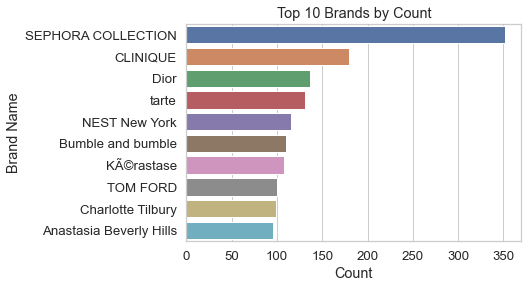

In [81]:
# I want to define the 10 top brands to plot them easily
top_brands = sephrev['brand_name'].value_counts().head(10)

# I will plot the top brands on a bar graph that shows the number of times each brand has been sold
sns.countplot(y='brand_name', data=sephrev, order=top_brands.index)
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.title('Top 10 Brands by Count')
plt.show()

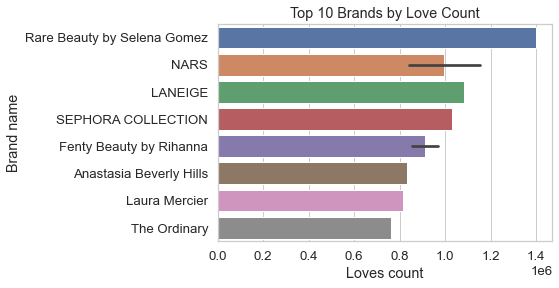

In [82]:
# Defining the top 'Loves_count' and then selecting just the top 10
top_loves_count = sephrev.sort_values('loves_count',ascending = False).head(10)


# I will create a bar graph for the top 10 brands based on the loves_count
sns.barplot(y = top_loves_count['brand_name'], x = top_loves_count['loves_count'])
plt.xlabel('Loves count')
plt.ylabel('Brand name')
plt.title('Top 10 Brands by Love Count')
plt.show()

At this point, it is important to mention that almost any of the top brands by count are part of the top brands based on the love count. For instance, Rare Beauty is considered the most loved by the customers but is not part by count of the top brands.

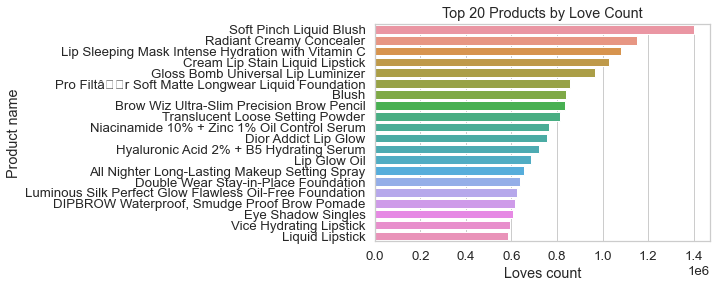

In [83]:
# Again defining the top 'loves_count' and then selecting just the top 20
top_loves_count = sephrev.sort_values('loves_count',ascending = False).head(20)


# Plotting the top 'product_name' based on the 'loves_count'
sns.barplot(y = top_loves_count['product_name'], x = top_loves_count['loves_count'])
plt.xlabel('Loves count')
plt.ylabel('Product name')
plt.title('Top 20 Products by Love Count')
plt.show()

Based on this visualization we can notice that, at least for Rare Beauty, the most loved product is produced by the most loved brand.

In [84]:
# Let's see what the rating scales tells us about the rest of the columns. With this I will understand how the rating scale relates with the other criteria considering the mean

grouped_data = sephrev.groupby('rating').mean()

print(grouped_data)

        loves_count     reviews  price_usd  limited_edition       new  \
rating                                                                  
1.0000  1397.833333    1.750000  78.166667         0.166667  0.083333   
1.1905  3778.000000   21.000000  24.000000         0.000000  0.000000   
1.2500  1614.000000    4.000000  75.000000         1.000000  0.000000   
1.3333   590.000000    3.000000  38.000000         1.000000  0.000000   
1.5000  3952.000000    2.000000  48.000000         1.000000  0.000000   
...             ...         ...        ...              ...       ...   
4.9818  1549.000000  110.000000  29.990000         0.000000  0.000000   
4.9825  2892.000000   57.000000  35.000000         1.000000  1.000000   
4.9841  2304.000000   63.000000  46.000000         0.000000  0.000000   
4.9937  6772.000000  158.000000  29.950000         0.000000  1.000000   
5.0000  2639.898438    3.898438  61.466758         0.289062  0.253906   

        online_only  out_of_stock  sephora_exclusi

From the previous data grouping, it is important to notice that the rating scale isn't proportional to the number of likes. Rating 1.1905 has more 'loves_count' than 5.0000. The same happens with the comparison between rating and reviews. This is an important fact that wasn't provide with just the correlation matrix.

In [85]:
# Grouping by reviews to see the rest of the columns
grouped_data = sephrev.groupby('reviews').mean()

print(grouped_data)

           loves_count    rating  price_usd  limited_edition       new  \
reviews                                                                  
1.0        1830.564516  4.250000  53.879032         0.258065  0.250000   
2.0        2162.472222  4.121528  66.083264         0.340278  0.180556   
3.0        2948.911290  4.034948  65.221774         0.274194  0.145161   
4.0        3487.753731  3.863806  68.175373         0.283582  0.111940   
5.0        3859.915966  3.976471  55.100840         0.235294  0.109244   
...                ...       ...        ...              ...       ...   
16935.0  856497.000000  4.035600  40.000000         0.000000  0.000000   
17179.0  543118.000000  4.377300  25.000000         0.000000  0.000000   
18127.0  840076.000000  4.664300  32.000000         0.000000  0.000000   
18610.0  532085.000000  3.737300  28.000000         0.000000  0.000000   
21281.0  566585.000000  4.131000  25.000000         0.000000  0.000000   

         online_only  out_of_stock  s

Unlike what happened in the previous analysis, there is a positive relationship between the reviews and the number of likes of 'loves_count'.

In [86]:
# Let's see what grouping by the price shows using statistics
grouped_data = sephrev.groupby('price_usd').agg(['mean', 'sum', 'min', 'max', 'count', 'std', 'var'])

print(grouped_data)

            loves_count                                              \
                   mean     sum    min     max count            std   
price_usd                                                             
3.00       53435.500000  320613    265  266116     6  104708.372370   
3.50       43354.666667  130064   9852   94157     3   44735.803405   
4.00       31876.500000   63753   6314   57439     2   36150.834188   
4.50       47223.000000   47223  47223   47223     1            NaN   
4.95       16473.000000   16473  16473   16473     1            NaN   
...                 ...     ...    ...     ...   ...            ...   
429.00      3117.000000    6234   2112    4122     2    1421.284630   
449.00     12250.333333   36751   5875   16672     3    5657.420997   
465.00      6836.000000    6836   6836    6836     1            NaN   
495.00       760.000000     760    760     760     1            NaN   
1900.00     4154.000000    4154   4154    4154     1            NaN   

     

Interestingly, the lower prices have more 'love_count' in average.

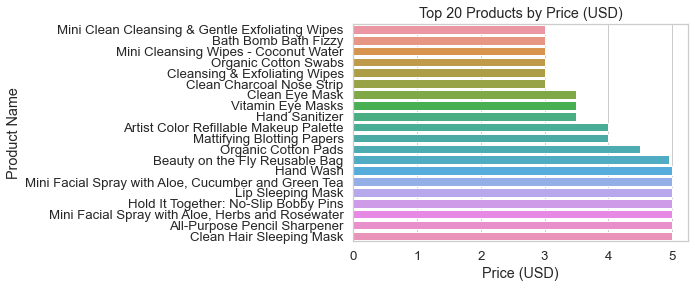

In [87]:
# I want to sort by 'price_usd' in ascending order, selecting the top 20
top_20_products = sephrev.sort_values('price_usd', ascending=True).head(20)

# I will create a visualiation using a bar plot for the top 20 'price_usd' and 'product_name'
sns.barplot(y=top_20_products['product_name'], x=top_20_products['price_usd'])
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.title('Top 20 Products by Price (USD)')
plt.show()


This is one of the analysis that we could double click on to have more insights about how prices and products behave in Sephora. In this case, showing from the top lowest priced products. For example, including not just product name and price but quantity to evaluate if it is actually cheap or expensive. This could be later be compared with the data of another retailer such as ULTA.

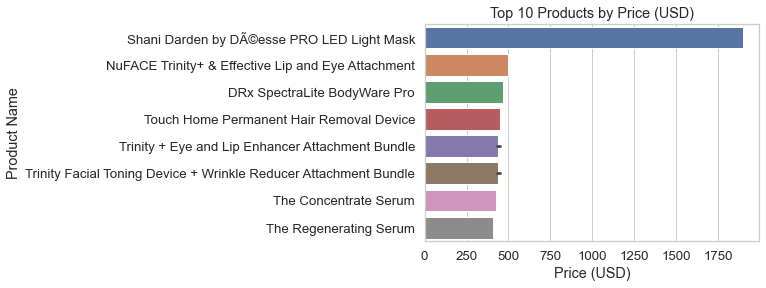

In [88]:
# I want to define the top products by 'price_usd' in descending order 
top_10_products = sephrev.sort_values('price_usd', ascending=False).head(10)

# Visualizing data in a bar plot for the top 20 'price_usd' and 'product_name'
sns.barplot(y=top_10_products['product_name'], x=top_10_products['price_usd'])
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Price (USD)')
plt.show()


This is graph is very interesting to see which are the top products for a high-end consumer. It is important to mention that not all of them are devices but also skincare products such as serums.

In [89]:
# Let's see which is the average price in the primary categories
grouped_data = sephrev.groupby('primary_category')['price_usd'].mean()

print(grouped_data)

primary_category
Bath & Body        42.233333
Fragrance          87.262570
Gifts              50.000000
Hair               42.786701
Makeup             32.757995
Men                33.200000
Mini Size          21.397569
Skincare           60.512500
Tools & Brushes    31.922115
Name: price_usd, dtype: float64


Based on the data just provided, Sephora could have a clear scenario of which is the mean price of their products by category. This could help to change a little the perspective that all products of Sephora are expensive. In more more precise way, it could be said that the most expensive category is Fragance and the cheapest is, for obvious reasons, mini size.

In [90]:
# Let's see which is the average price based on the brands
grouped_data = sephrev.groupby('brand_name')['price_usd'].mean()

print(grouped_data)

brand_name
19-69               112.857143
54 Thrones           39.750000
ABBOTT               54.076923
AERIN               103.333333
ALTERNA Haircare     37.844444
                       ...    
philosophy           24.000000
rms beauty           35.636364
shu uemura           54.930233
stila                26.909091
tarte                24.954198
Name: price_usd, Length: 304, dtype: float64


Following the previous analysis, the previous grouping is useful to identify which are the average prices on the brands with the highest and lowest means.

In [91]:
# Let's see which is the average price based on the product
grouped_data = sephrev.groupby('product_name')['price_usd'].mean()

print(grouped_data)

product_name
"B" Oil                                     11.1
"Buffet" + Copper Peptides 1%               30.9
"The Martini" Emotional Detox Bath Soak     40.0
"Ultimate Man" Body Scrub Soap              20.0
#10 Radiant Creamy Concealer Brush          26.0
                                           ...  
âREPLICAâ On A Date                    160.0
âREPLICAâ On A Date Travel Spray        35.0
âREPLICAâ On a Date Scented Candle      70.0
âREPLICAâ Sailing Day                  160.0
âREPLICAâ Sailing Day Travel Spray      35.0
Name: price_usd, Length: 8415, dtype: float64


Now average price grouped by products.

In [92]:
# Let's find out which are the most popular primary categories
sephrev ['primary_category'].value_counts ()

Skincare           2420
Makeup             2369
Hair               1464
Fragrance          1432
Bath & Body         405
Mini Size           288
Men                  60
Tools & Brushes      52
Gifts                 4
Name: primary_category, dtype: int64

An inverse analysis of the data provided can be used by Sephora to know which are the categories that could sell more products. In order words, which are the ones that require more investment and marketing to grow more. These are: gifts, tools & brushes and men. Now, a deeper analysis should provide information to know if men products have been included in the top sold categories: skincare, makeup, hair and fragrance. In particular the last one that has a higher average price.

In [93]:
# Let's find out which are the most popular secondary categories
sephrev ['secondary_category'].value_counts ()

Women                        875
Hair Styling & Treatments    757
Eye                          711
Face                         659
Moisturizers                 551
Value & Gift Sets            498
Treatments                   466
Shampoo & Conditioner        431
Lip                          411
Cleansers                    361
Candles & Home Scents        263
Brushes & Applicators        246
Body Moisturizers            220
Mini Size                    187
Eye Care                     186
Masks                        166
Cheek                        165
Tools                        153
Makeup                       137
Men                          135
Sunscreen                    109
Skincare                      98
Bath & Shower                 84
High Tech Tools               80
Wellness                      79
Body Care                     69
Self Tanners                  64
Lip Balms & Treatments        61
Hair                          59
Nail                          52
Accessorie

This gives a little more information on how the products are distributed by the retailer.

After having a wide exploratory data analysis, it is time to verify whether the hypotheses mentioned are true or false.

## <h1 align='center'> Hypotheses Testing

## Hypothesis 1: Primary product category has significantly different average prices.

In [94]:
# Defining that category_groups is made up of the column 'primary_category'
# Using groupby to have the prices of each entry of 'primary_category'
category_groups = sephrev.groupby('primary_category')['price_usd']

# ANOVA is a Analysis of Variance that helps to compare mean averages. In this case, average prices in the 'primary_category' to se if prices in the category are significantly different.
f_statistic, p_value = f_oneway(*[group.values for name, group in category_groups])

# I will do statistical hypothesis testing to test the hypothesis
# Depending if the resulting value is bigger or smaller than the significance level, we will be able to reject or no the hypothesis

if p_value < 0.05:
    print("There is a significant difference in average prices across product categories.")
else:
    print("There is no significant difference in average prices across product categories.")

There is a significant difference in average prices across product categories.


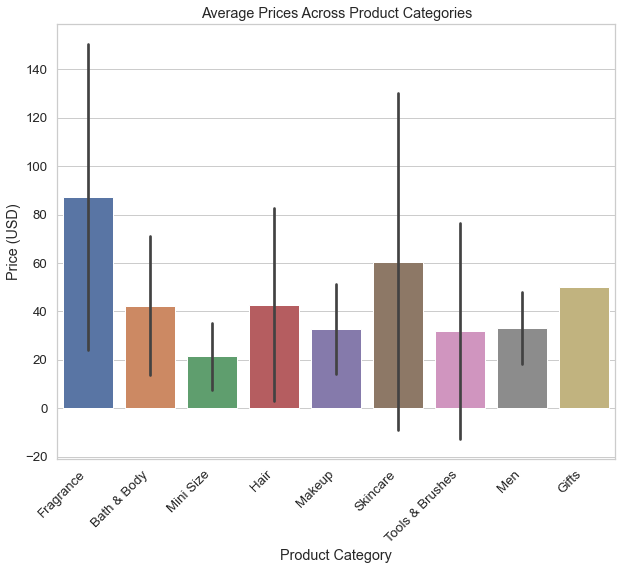

In [95]:
# I will plot a bar plot to visualize the average prices across product categories
plt.figure(figsize=(10, 8))
sns.barplot(x=sephrev['primary_category'], y=sephrev['price_usd'], ci='sd')
plt.xlabel('Product Category')
plt.ylabel('Price (USD)')
plt.title('Average Prices Across Product Categories')
plt.xticks(rotation=45, ha='right')
plt.show()


Based on the statistical testing and its visualization, we can conclude that there is actually a average price difference on the products of the primary category. Still, fragances are the most expensive products followed by skincare. 

## Hypothesis 2: The average price of products varies across different brands.

In [96]:
# Defining that brand_groups is made up of the column 'brand_name'
# Using groupby to have the prices of each entry of 'brand_name
brand_groups = sephrev.groupby('brand_name')['price_usd']

# ANOVA test to compare mean averages
f_statistic, p_value = f_oneway(*[group.values for name, group in brand_groups])

if p_value < 0.05:
    print("There is a significant difference in average prices across different brands.")
else:
    print("There is no significant difference in average prices across different brands.")

There is a significant difference in average prices across different brands.


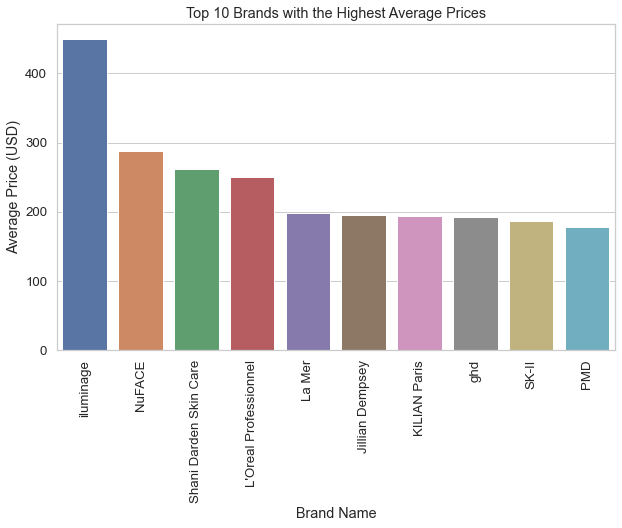

In [97]:
# Calculate the average prices for each brand
brand_avg_prices = sephrev.groupby('brand_name')['price_usd'].mean().reset_index()

# Sort the brands based on average prices and select the top 10 brands
top_10_brands = brand_avg_prices.nlargest(10, 'price_usd')

# Create a bar plot to visualize the average prices for the top 10 brands
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_brands['brand_name'], y=top_10_brands['price_usd'])
plt.xlabel('Brand Name')
plt.ylabel('Average Price (USD)')
plt.title('Top 10 Brands with the Highest Average Prices')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

To make this analysis more interesting, after statistically proving that there is a significant difference in average across brands, I decided to see that behavior in the brands with highest prices. Iluminiage is by far the most expensive brand.

## Hypothesis 3: The average loves count for products in the primary category "Makeup" is significantly different from the average loves count for products in the primary category "Skincare".

In [98]:
# From the'primary_category' column, separate data considering makeup and skincare subcategories
makeup_group = sephrev[sephrev['primary_category'] == 'Makeup']['loves_count']
skincare_group = sephrev[sephrev['primary_category'] == 'Skincare']['loves_count']

# t-test
t_statistic, p_value = ttest_ind(makeup_group, skincare_group, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("There is a significant difference in the average loves count between products in the primary category 'Makeup' and 'Skincare'.")
else:
    print("There is no significant difference in the average loves count between products in the primary category 'Makeup' and 'Skincare'.")

There is a significant difference in the average loves count between products in the primary category 'Makeup' and 'Skincare'.


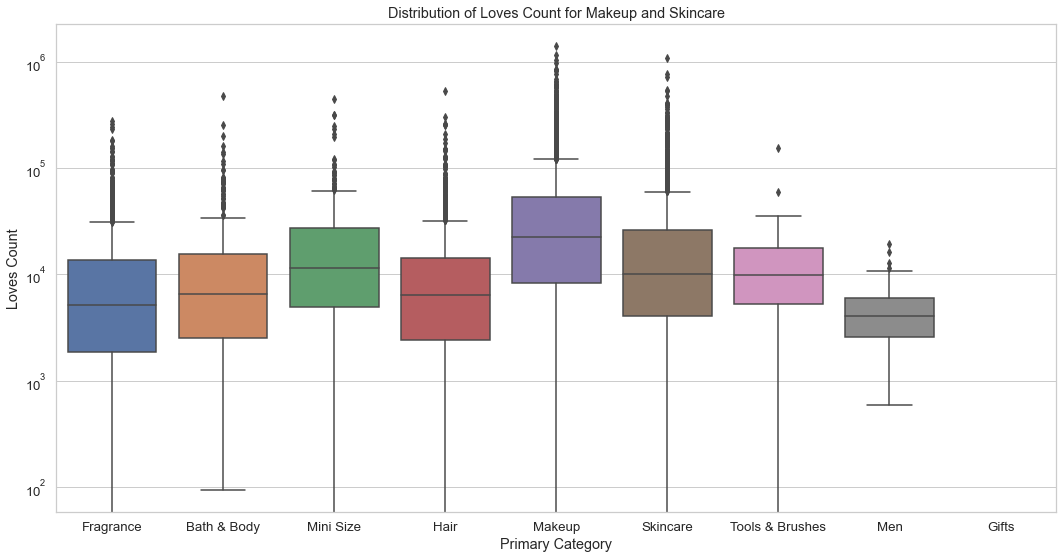

In [99]:
# Set up the plot style
sns.set(style='whitegrid', font_scale=1.2) 
plt.figure(figsize=(15, 8))  

# Create a single box plot for 'Makeup' and 'Skincare' 
sns.boxplot(x='primary_category', y='loves_count', data=sephrev)
plt.yscale('log')  
plt.xlabel('Primary Category')
plt.ylabel('Loves Count')
plt.title('Distribution of Loves Count for Makeup and Skincare')
plt.tight_layout()  
plt.show()


After the statistical testing, it was necessary to do something else to be completely sure that the hypothesis was true. Creating a box plot was helpful because it is actually evident the difference in the loves count distribution. The difference between makeup and skincare is noticiable.

## Sentimental Analysis

The following sentimental analysis will be divided in two parts. First, two word clouds we will be analyzed to know which are the most common or used words in two important columns. Secondly, we will run two sentiment polarity test. Insights will be drawn at the end.

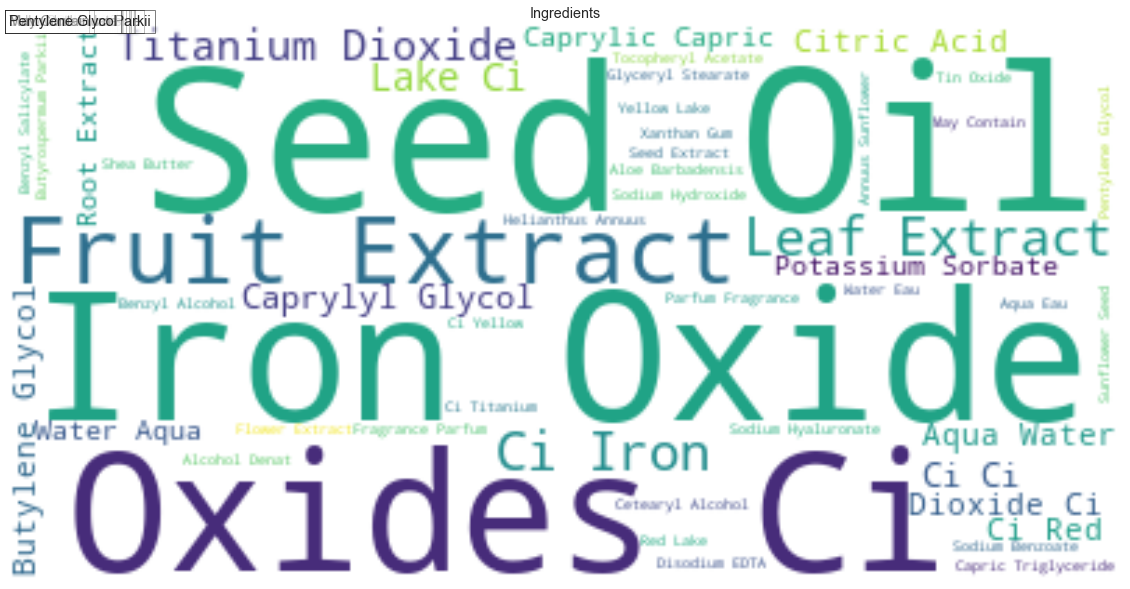

In [100]:
# Defining the varible to visualize the ingredients in a wordcloud
text_data = ' '.join(sephrev['ingredients'])

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=50)

# Generate the word cloud
wordcloud_image = wordcloud.generate(text_data)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(wordcloud_image, interpolation='bilinear')
ax.axis('off')
for word, frequency in wordcloud.words_.items():
    bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1, alpha=0.5)
    ax.text(wordcloud.words_[word], 0, word, bbox=bbox_props)

plt.title('Ingredients')
plt.show()


The result of this wordcloud provides an important approach to how customers approach to beauty and skincare ingredients. There is still a big challenge for beauty companies and retailers to be more meaningful in terms of ingredient education. Even though there are some apps like Good Face and OnSkin, there is still a lot of educational opportunities.

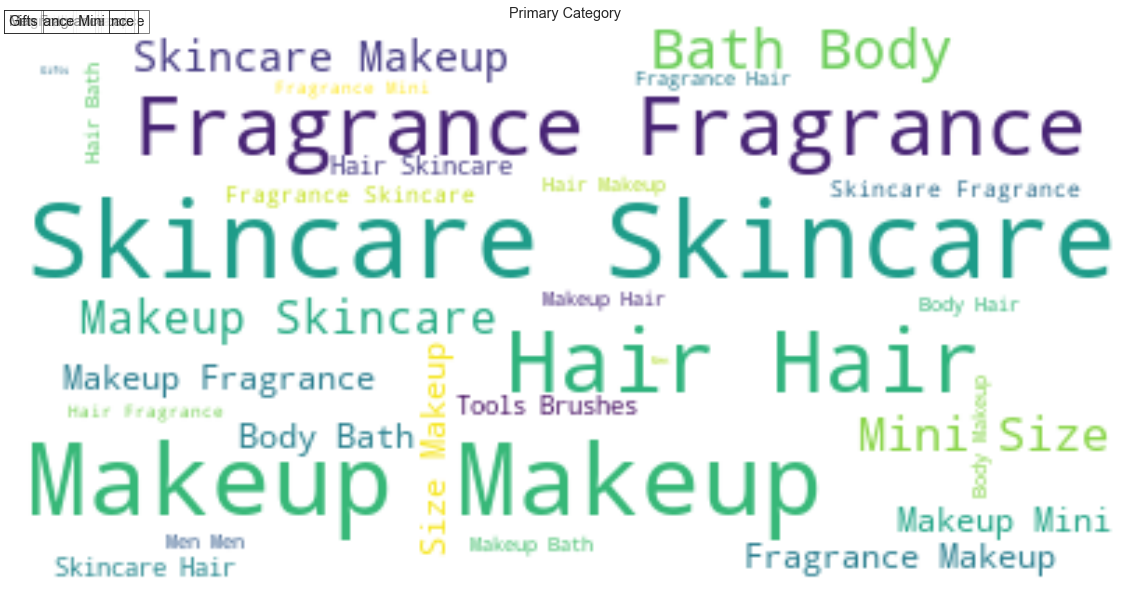

In [101]:
# Defining the variable to generate another word cloud
text_data = ' '.join(sephrev['primary_category'])

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', max_words=50)

# Generate the word cloud
wordcloud_image = wordcloud.generate(text_data)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(wordcloud_image, interpolation='bilinear')
ax.axis('off')
for word, frequency in wordcloud.words_.items():
    bbox_props = dict(boxstyle='square,pad=0.3', facecolor='white', edgecolor='black', linewidth=1, alpha=0.5)
    # Provide the x and y positions and the text string 'word'
    ax.text(wordcloud.words_[word], 0, word, bbox=bbox_props)

plt.title('Primary Category')
plt.show()


The use of a wordcloud about the primary category can be either used to reinsure the actual common categories, just as the ones actually shown, or to start promiting the ones that are less sold.

In [102]:
# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment < 0:
        return 0  # Negative sentiment
    else:
        return 1  # Positive sentiment


In [103]:
# Convert the 'reviews' column to strings
sephrev['reviews'] = sephrev['reviews'].astype(str)

# Applying the sentiment analysis and assigning values to a new column called 'sentiment'
sephrev['sentiment'] = sephrev['reviews'].apply(get_sentiment)

selected_columns = sephrev.loc[:, ['reviews', 'sentiment']]
selected_columns.head()

,reviews,sentiment
0,11.0,1
1,13.0,1
2,16.0,1
3,21.0,1
4,13.0,1


In [104]:
# Displaying text with negative sentiment to be sure the analysis worked
selected_rows = sephrev.loc[sephrev['sentiment'] == 0, ['reviews', 'sentiment']]
selected_rows.head()

,reviews,sentiment


In [105]:
# Convert the 'reviews' column to strings
sephrev['rating'] = sephrev['rating'].astype(str)

# Applying the sentiment analysis and assigning values to a new column called 'sentiment'
sephrev['sentiment'] = sephrev['rating'].apply(get_sentiment)

selected_columns = sephrev.loc[:, ['rating', 'sentiment']]
selected_columns.head()

,rating,sentiment
0,3.6364,1
1,4.1538,1
2,4.25,1
3,4.4762,1
4,3.2308,1


In [106]:
# Displaying text with negative sentiment to be sure the analysis worked
selected_rows = sephrev.loc[sephrev['sentiment'] == 0, ['rating', 'sentiment']]
selected_rows.head()

,rating,sentiment


The two sentiment analysis done didn't show interesting or significant information. It could be said that they didn't work even if they runned because of the type of data selected. Even if ratings and reviews could be considered as columns that could tell how customers feel about the products, the way there were collected doesn't allow that analysis.

## Insights and Conclusion

Insights were provided throughout the analysis. They will be restated before concluding.

'Love_count' and 'reviews' are have a high correlation, unlike 'rating' and 'Love_count'.

Rare Beauty is considered the most loved brand by the customers. The most loved product is produced by the most loved brand.

Based on the data just provided, Sephora could have a clear scenario of which is the mean price of their products by category. This could help to change a little the perspective that all products of Sephora are expensive. In more more precise way, it could be said that the most expensive category is Fragance and the cheapest is, for obvious reasons, mini size.

Gifts, tools & brushes and men are the categories that require more investment and marketing to grow more . Now, a deeper analysis should provide information to know if men products have been included in the top sold categories: skincare, makeup, hair and fragrance. In particular the last one that has a higher average price.

There is an average price difference on the products of the primary category. Still, fragances are the most expensive products followed by skincare.

Iluminiage is by far the most expensive brand.

A lot of information is provided by the database selected. This was just a preview of what could be analyzed. It is importand to mention the special emphasis in pricing as a relevant factor for the consumer. A comparison with other retailers such as ULTA could be really interesting to identify their respective strengths and weaknesses.